In [6]:
import json
from matplotlib import pyplot as plt
from pandas import DataFrame
from pathlib import Path

In [7]:
PROJECT_DIR = Path("/home/yutanagano/Projects/tcr_embedder/")
BENCHMARKS_DIR = PROJECT_DIR/"benchmarks"

def load_stats(model_name: str, task_name: str) -> DataFrame:
    stats_dir = BENCHMARKS_DIR/model_name/task_name
    with open(stats_dir/"results.json", "r") as f:
        stats_dict = json.load(f)

    if "svc_classification" in stats_dict:
        return DataFrame(stats_dict["svc_classification"]).T
    
    return DataFrame(stats_dict["nn_classification"]).T

In [8]:
tcrdist_stats = load_stats("tcrdist", "one_vs_rest")
sceptr_stats = load_stats("AB_SCEPTR", "one_vs_rest")

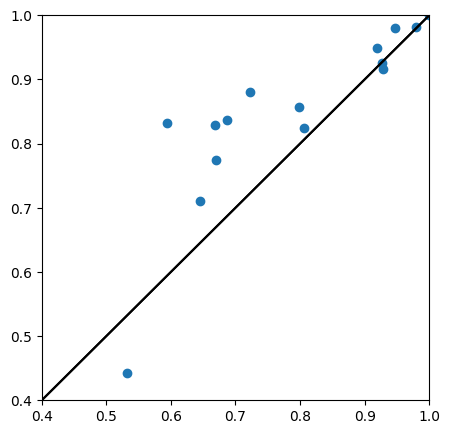

In [10]:
plt.figure(figsize=(5,5))

plt.plot([[0,0],[1,1]], color="k")
plt.scatter(tcrdist_stats["auc"], sceptr_stats["auc"])
plt.xlim(0.4,1)
plt.ylim(0.4,1)

plt.show()